# Mean Shift Clustering for Eurovision

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, joblib

from Modules import utils as utl
from Modules import data_exploration as de
from Modules import machine_learning as ml

from sklearn.cluster import  MeanShift, estimate_bandwidth
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import LabelEncoder

import plotly.express as pxp
import plotly.graph_objs as gph

### Data Preparation

In [4]:
csv_file_path = 'Data/finalists_cleaned.csv'
df = utl.load_csv(csv_file_path, skiprows=0, encoding='windows-1252')

In [5]:
df.shape

(358, 10)

In [6]:
df.head()

,year,final_draw_position,country,style,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points
0,2023,20,Norway,Pop,216.0,52.0,36.0,11.0,5.0,268.0
1,2023,5,Serbia,Pop,16.0,14.0,4.0,6.0,24.0,30.0
2,2023,2,Portugal,Pop,16.0,43.0,3.0,9.0,23.0,59.0
3,2023,25,Croatia,Pop,112.0,11.0,20.0,2.0,13.0,123.0
4,2023,3,Switzerland,Ballad,31.0,61.0,10.0,15.0,20.0,92.0


In [7]:
# Clean & select needed columns
df_clean = df[['style', 'final_place', 'year']].dropna()

In [8]:
# Encode 'style' as number
le = LabelEncoder()
df_clean['style_encoded'] = le.fit_transform(df_clean['style'])

In [9]:
X = df_clean[['style_encoded', 'final_place', 'year']].values

## Step 3: Train and Implement the Model

Update the candidates for centroids to be the mean of the points within a given region (also called bandwidth). The overlapping candidates are eliminated to avoid duplicates. There is no need for pre-defined number of clusters.

In [12]:
# Bandwidth/radius is found automatically with
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=130)
bandwidth 

4.432031038517905

In [13]:
# Train mean-shift model with the data frame
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)

MeanShift(bandwidth=4.432031038517905, bin_seeding=True)

In [14]:
# get the calculated values 
labels = msmodel.labels_
labels_unique = np.unique(labels)
labels_unique

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [15]:
n_clusters_ = len(labels_unique)
n_clusters_

6

In [16]:
# See the clusters and cluster centres
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[2.47272727e+00, 2.20181818e+01, 2.01558182e+03],
       [2.29090909e+00, 1.29272727e+01, 2.01354545e+03],
       [2.01818182e+00, 1.74545455e+01, 2.01274545e+03],
       [2.14814815e+00, 8.48148148e+00, 2.01277778e+03],
       [2.17021277e+00, 1.30212766e+01, 2.01931915e+03],
       [2.35555556e+00, 4.48888889e+00, 2.01888889e+03]])

In [17]:
# Predict the cluster for all the samples for test
Y = msmodel.predict(X)
Y

array([5, 0, 0, 4, 0, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       5, 5, 0, 0, 4, 4, 5, 4, 5, 4, 0, 5, 4, 0, 0, 5, 4, 4, 4, 4, 4, 4,
       5, 0, 5, 5, 0, 5, 0, 5, 4, 4, 4, 4, 4, 4, 0, 5, 5, 4, 4, 4, 0, 4,
       4, 5, 5, 4, 0, 0, 0, 5, 5, 4, 4, 4, 0, 4, 4, 4, 0, 0, 0, 5, 4, 5,
       4, 5, 4, 5, 5, 5, 5, 0, 0, 0, 4, 5, 0, 4, 5, 4, 5, 5, 4, 5, 0, 4,
       5, 4, 0, 4, 4, 0, 0, 0, 5, 0, 4, 0, 0, 5, 4, 5, 0, 5, 3, 5, 4, 5,
       0, 0, 5, 0, 0, 4, 5, 4, 5, 0, 4, 4, 2, 5, 0, 5, 0, 4, 0, 0, 4, 0,
       0, 1, 3, 5, 0, 0, 1, 2, 1, 1, 3, 1, 2, 3, 5, 5, 5, 0, 3, 2, 5, 0,
       5, 0, 0, 2, 5, 2, 3, 3, 0, 5, 2, 1, 1, 2, 1, 3, 3, 3, 1, 5, 0, 1,
       0, 0, 0, 0, 0, 0, 5, 3, 5, 1, 3, 0, 3, 0, 5, 2, 3, 0, 3, 1, 5, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 3, 3, 2, 2, 5, 3, 3, 3, 0, 2, 1, 0, 1, 5,
       0, 3, 2, 3, 2, 3, 3, 1, 1, 0, 0, 0, 2, 1, 3, 2, 2, 3, 1, 2, 0, 3,
       0, 1, 2, 3, 1, 2, 2, 3, 3, 3, 0, 2, 1, 0, 0, 3, 3, 3, 3, 1, 2, 0,
       3, 2, 2, 0, 2, 3, 3, 3, 2, 3, 1, 3, 1, 2, 0,

In [18]:
len(msmodel.labels_)

358

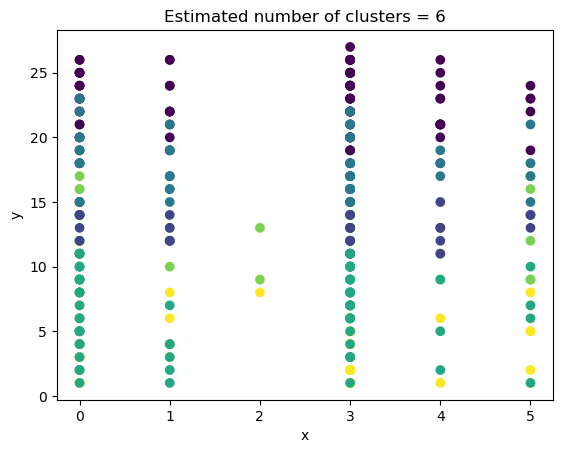

In [19]:
# Generate scatter plot for the training data
# colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

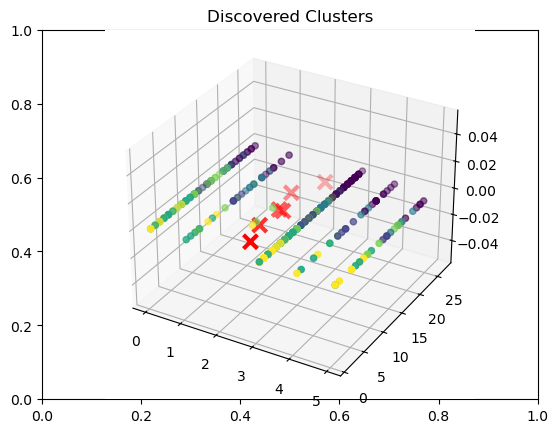

In [20]:
# Visualising the clusters in 3D
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

In [21]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.2538544486374131


##### Low score suggests cluster are distingguishable but not very strongly separated, which makes sense given how many other factors are involved while we are just looking at year, final_place and style. Clusters likely overlap. Mean-Shift however, is also known to somewhat lower scores than for subjective real-world data.

## Store the Model

In [24]:
# Store the model in a file
model_file = 'Models/meanshift.pkl'
label_encoder = 'Models/label_encoder.pkl'

In [25]:
# save the model
joblib.dump(msmodel, model_file)

['Models/meanshift.pkl']

In [26]:
joblib.dump(le, label_encoder)

['Models/label_encoder.pkl']